<a href="https://colab.research.google.com/github/archikSV/AI_Exam/blob/main/Exam_Task1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Встановлення та імпорт модулів

In [ ]:
import subprocess
import sys

# Функція для встановлення модулів
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    print(f"Модуль {package} було завантажено.")

# Функція для перевірки та встановлення модулів
def check_and_install(package):
    try:
        __import__(package)
        print(f"Модуль {package} вже встановлено.")
    except ImportError:
        install(package)

# Перевірка та встановлення необхідних модулів
modules = ['pandas', 'kaggle', 'tqdm', 'xgboost', 'lightgbm', 'optuna', 'joblib', 'torch', 'seaborn', 'numpy', 'matplotlib', 'imblearn']

for module in modules:
    check_and_install(module)

# Імпорт модулів (повний список)
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
import optuna
import joblib
import torch


Модуль pandas вже встановлено.
Модуль kaggle вже встановлено.
Модуль tqdm вже встановлено.
Модуль xgboost вже встановлено.
Модуль lightgbm вже встановлено.
Модуль optuna вже встановлено.
Модуль joblib вже встановлено.
Модуль torch вже встановлено.
Модуль seaborn вже встановлено.
Модуль numpy вже встановлено.
Модуль matplotlib вже встановлено.
Модуль imblearn вже встановлено.


In [ ]:
### Завантаження та підготовка даних

In [ ]:
# Включення API ключів
os.environ['KAGGLE_USERNAME'] = "moodduckkk"
os.environ['KAGGLE_KEY'] = "30a3b3c411bc0a6145c6f55fe9ab72c5"

# Шлях до файлу
file_path = '/mnt/data/archive.zip'
data_file = '/mnt/data/data.csv'

# Функція для завантаження даних з Kaggle
def download_data_from_kaggle():
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files('antongalysh/itstep-exam', path='/mnt/data', unzip=True)
    print("Дані успішно завантажені з Kaggle.")

# Перевірка чи файл існує
if not os.path.exists(data_file):
    print("Файл не знайдено. Завантаження з Kaggle...")
    download_data_from_kaggle()
else:
    print("Файл вже завантажений.")

# Завантаження даних
data = pd.read_csv(data_file)

# Вивчення структури даних
print("\nСтруктура даних:")
print(data.info())
print(data.head())


Файл вже завантажений.

Структура даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         318438 non-null  int64  
 1   case_id                            318438 non-null  int64  
 2   Hospital_code                      318438 non-null  int64  
 3   Hospital_type_code                 318438 non-null  object 
 4   City_Code_Hospital                 318438 non-null  int64  
 5   Hospital_region_code               318438 non-null  object 
 6   Available Extra Rooms in Hospital  318438 non-null  int64  
 7   Department                         318438 non-null  object 
 8   Ward_Type                          318438 non-null  object 
 9   Ward_Facility_Code                 318438 non-null  object 
 10  Bed Grade                          318325 non-null  float64
 11

In [ ]:
### Попередній аналіз даних

In [ ]:
# Визначення числових та категоріальних ознак
numerical_features = ['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital',
                      'Bed Grade', 'City_Code_Patient', 'Visitors with Patient',
                      'Admission_Deposit', 'doctorid']

categorical_features = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
                        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
                        'Stay']

print(f"Числові ознаки: {numerical_features}")
print(f"Категоріальні ознаки: {categorical_features}")

# Перевірка наявності пропущених значень
missing_values = data.isnull().sum()
print("\nПропущені значення до обробки:")
print(missing_values[missing_values > 0])

# Заповнення пропущених значень
data['Bed Grade'].fillna(data['Bed Grade'].mode()[0], inplace=True)
data['City_Code_Patient'].fillna(data['City_Code_Patient'].mode()[0], inplace=True)
data['doctorid'].fillna(data['doctorid'].mode()[0], inplace=True)

# Видалення зайвих стовпців на основі аналізу
columns_to_drop = ['patientid', 'country_code']
data.drop(columns=columns_to_drop, inplace=True)

# Перевірка, чи немає пропущених значень після обробки
missing_values_after = data.isnull().sum()
print("\nПропущені значення після обробки:")
print(missing_values_after[missing_values_after > 0])

# Переведення значень inf в NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Перевірка даних на наявність сміття
for feature in numerical_features:
    if data[feature].dtype == 'object':
        print(f"Невірний тип даних в числовій ознаці: {feature}")

for feature in categorical_features:
    if data[feature].dtype != 'object':
        print(f"Невірний тип даних в категоріальній ознаці: {feature}")


Числові ознаки: ['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit', 'doctorid']
Категоріальні ознаки: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']

Пропущені значення до обробки:
Bed Grade               113
City_Code_Patient      4532
doctorid             316012
dtype: int64

Пропущені значення після обробки:
Series([], dtype: int64)


In [ ]:
### Візуалізація даних

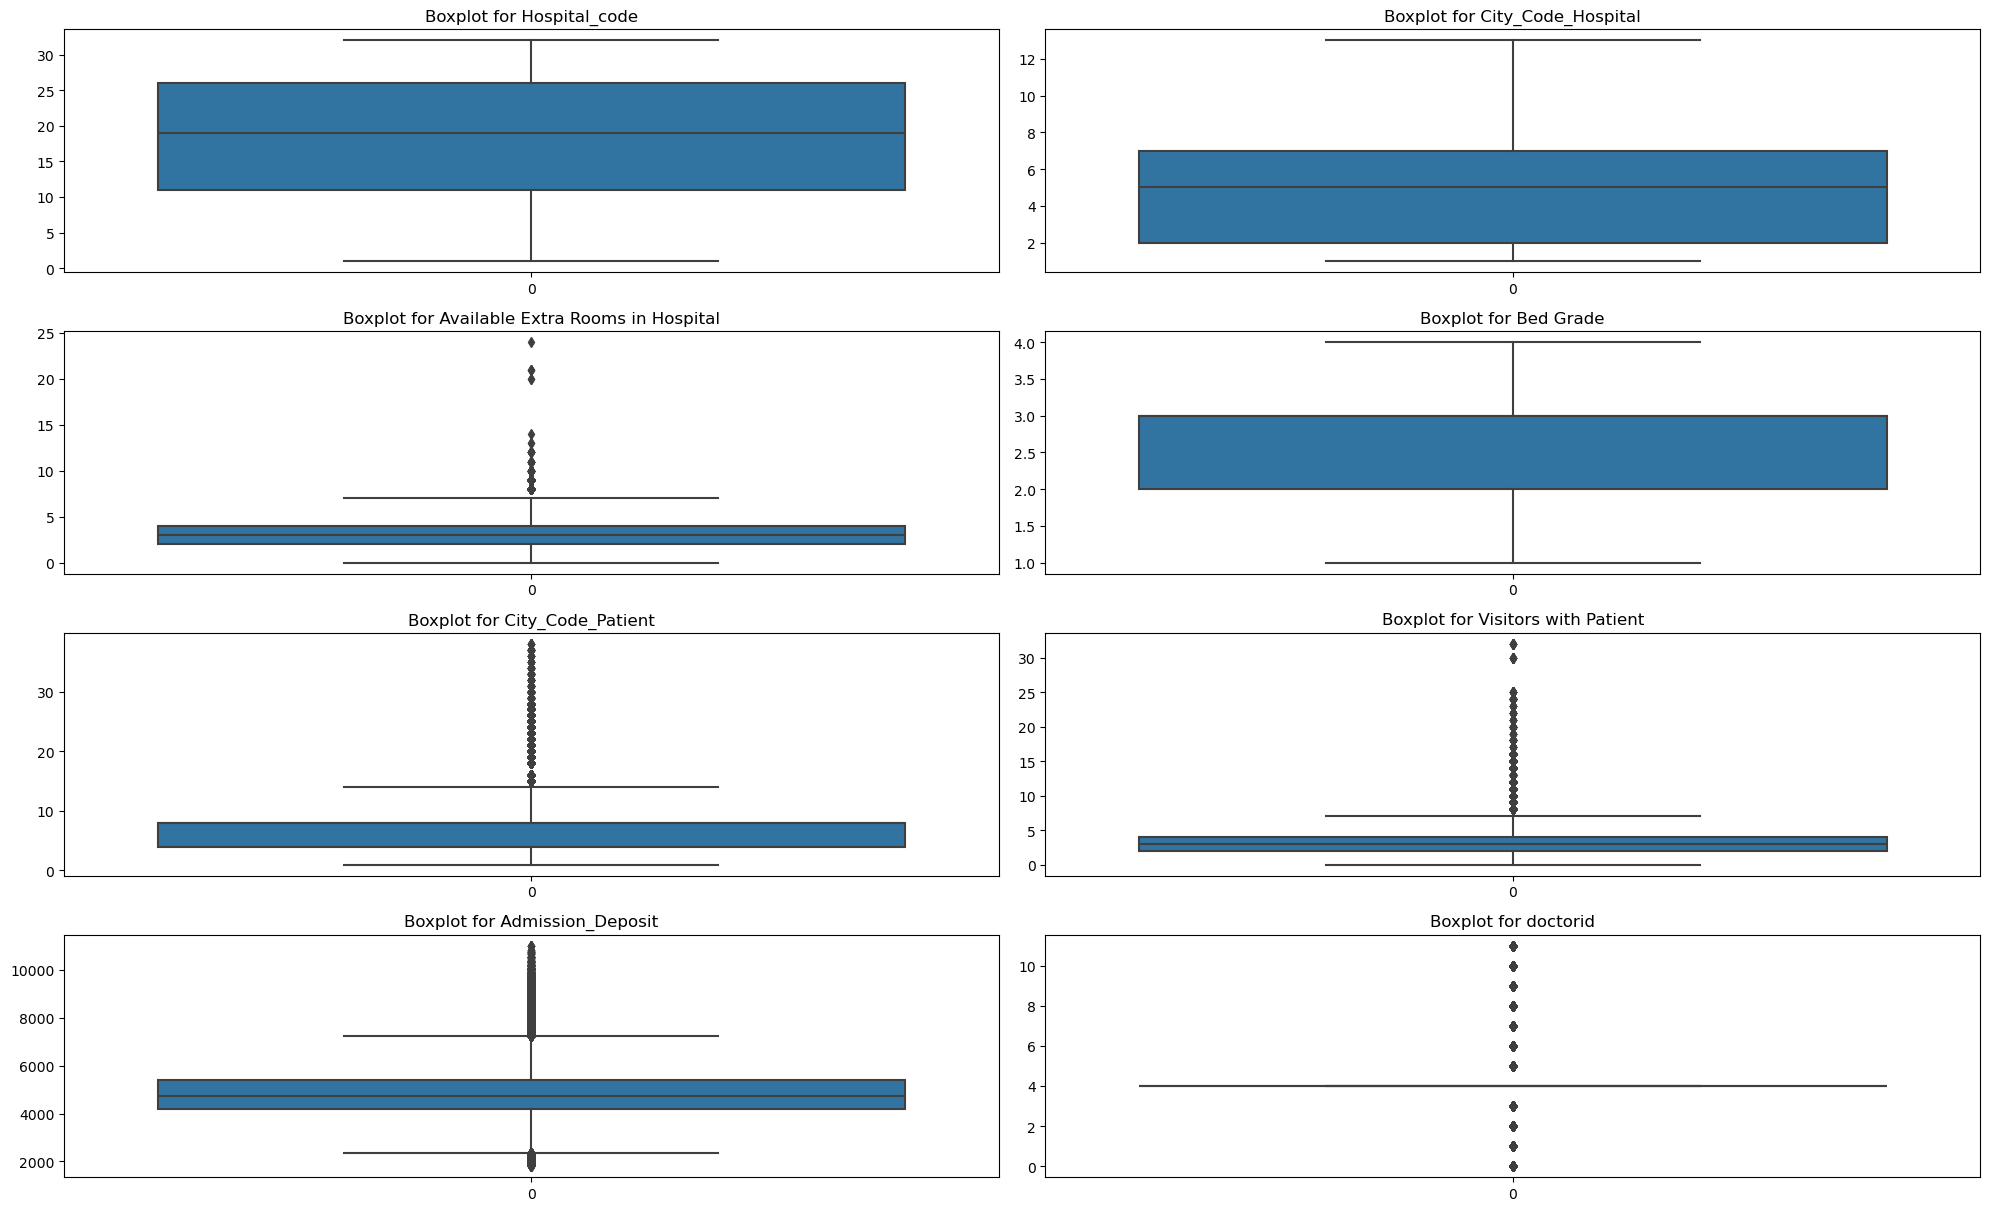

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

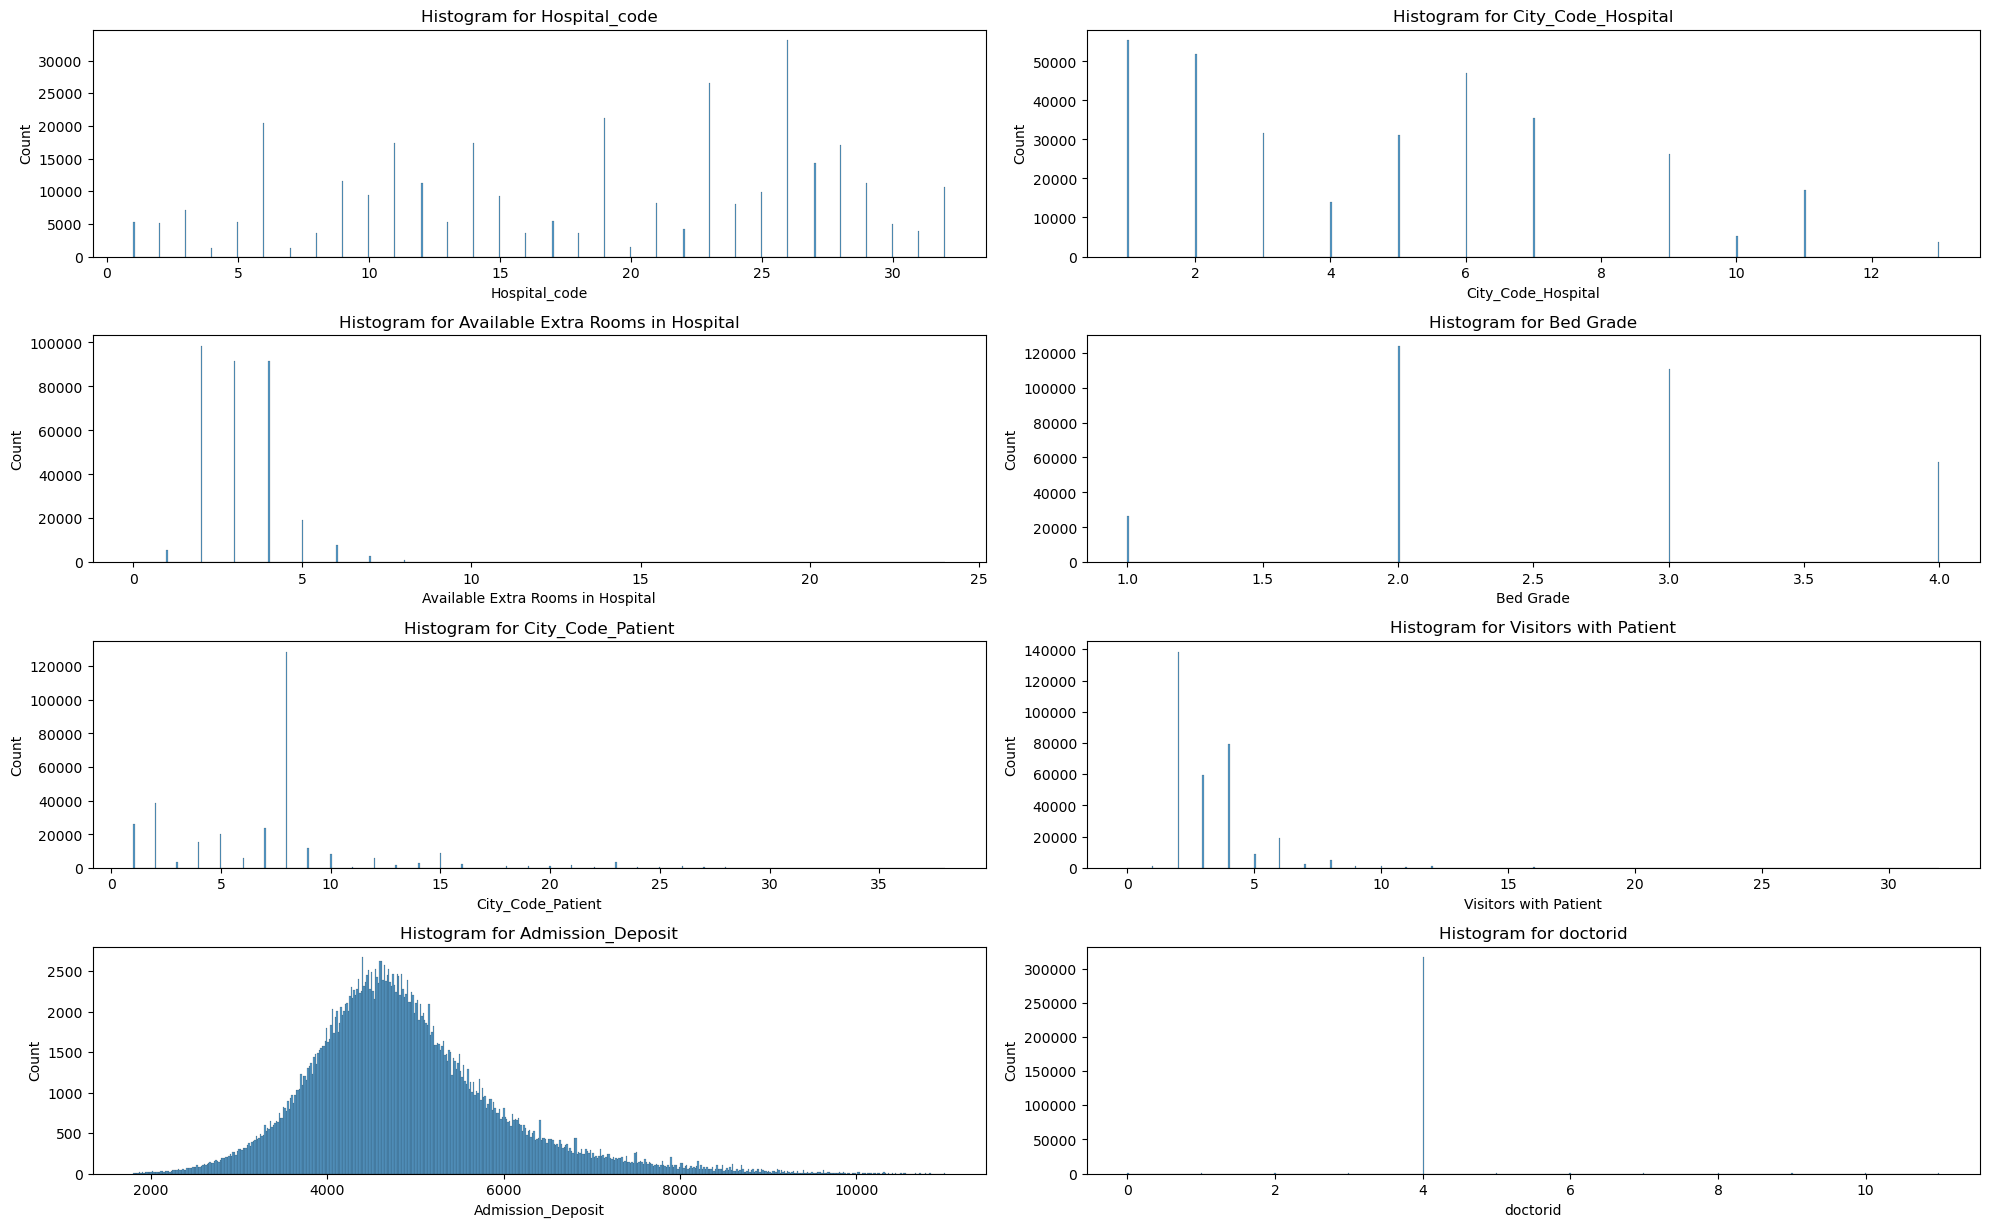

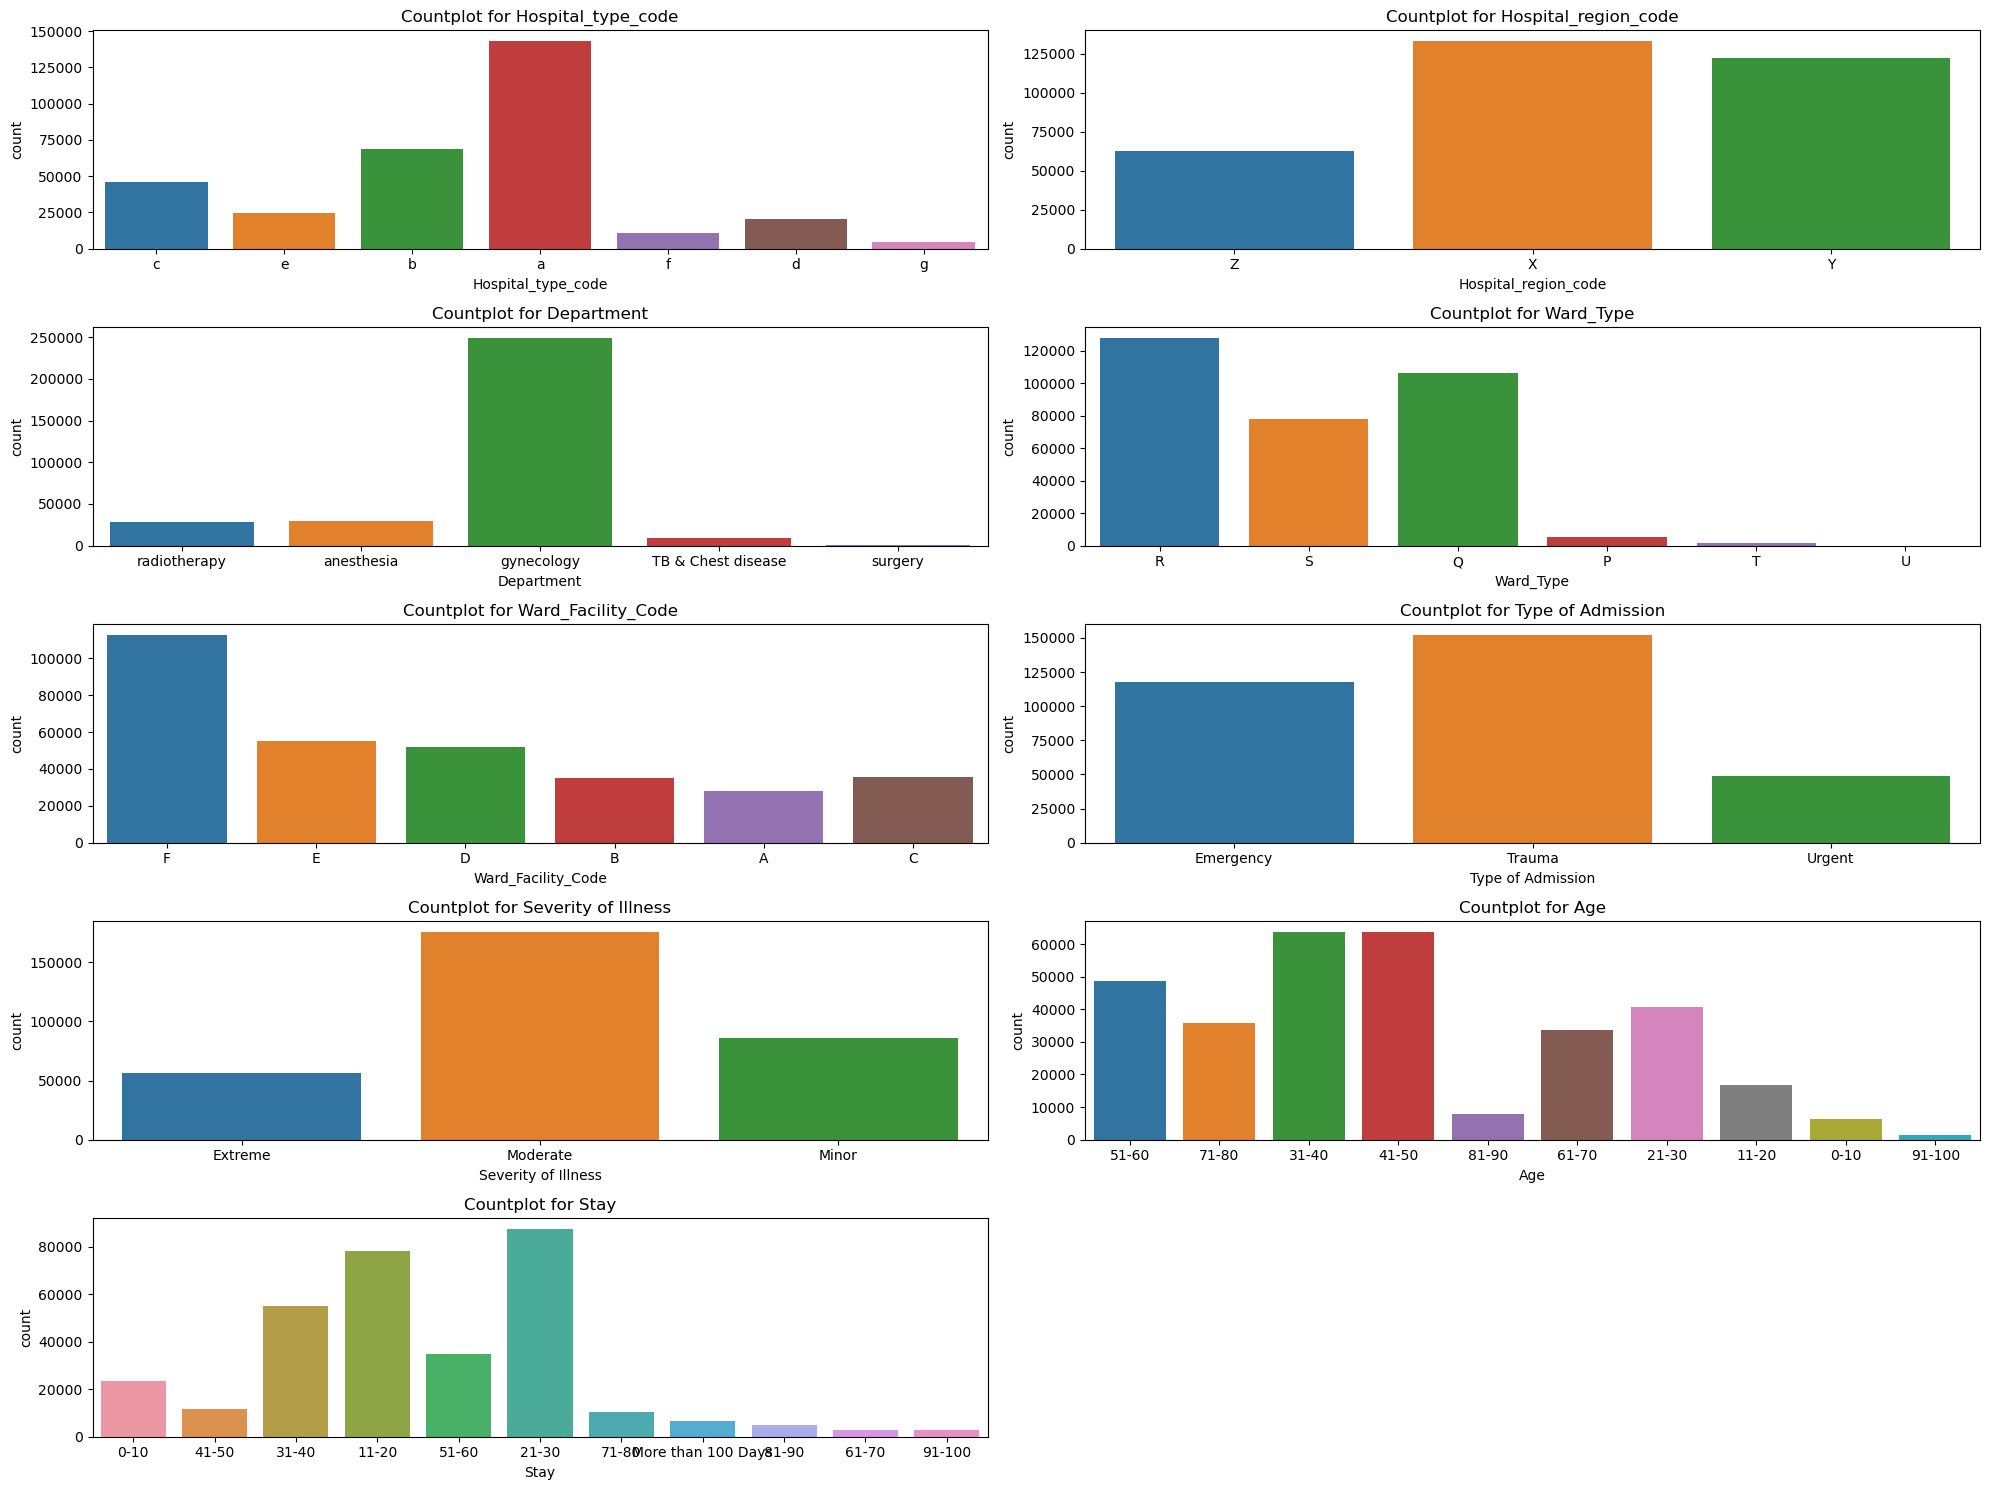

In [ ]:
# Візуалізація числових ознак для перевірки викидів
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=data[feature].dropna())  # Відфільтруємо NaN значення
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()

# Гістограми числових ознак
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i+1)
    sns.histplot(data[feature].dropna(), bins=int(np.sqrt(len(data))))
    plt.title(f'Histogram for {feature}')
plt.tight_layout()
plt.show()

# Гістограми категоріальних ознак
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f'Countplot for {feature}')
plt.tight_layout()
plt.show()


In [ ]:
### Обробка викидів


Ідентифікація викидів для Hospital_code:
Кількість викидів у Hospital_code: 0


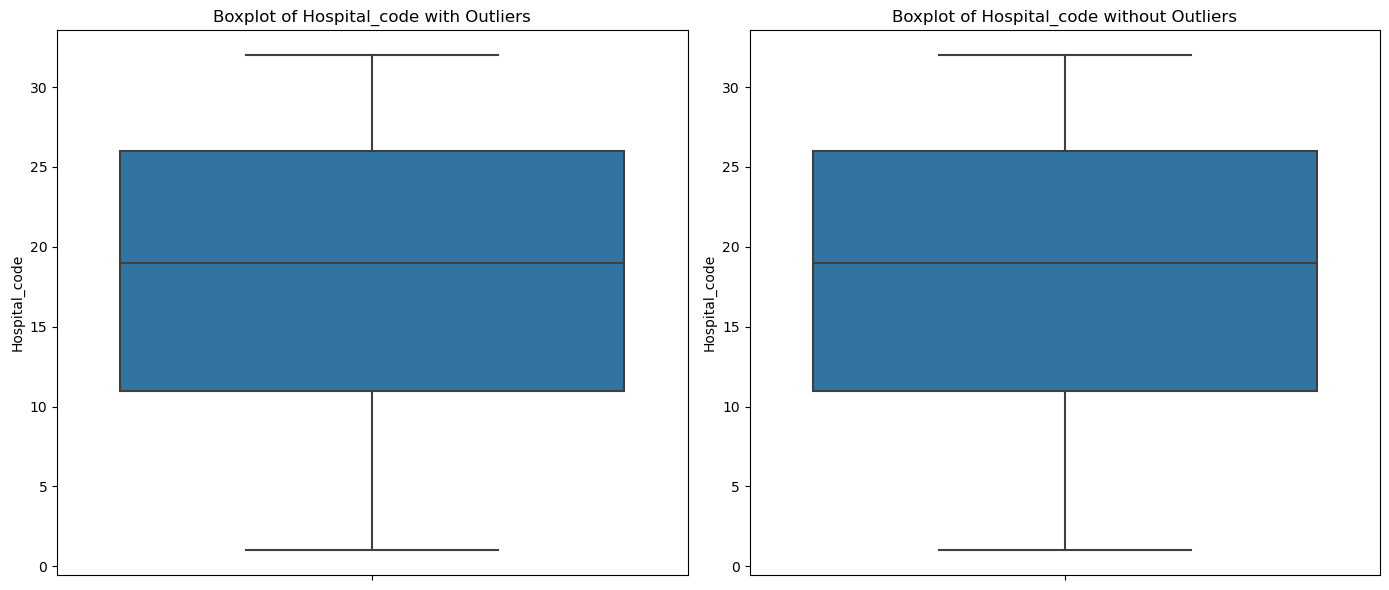


Ідентифікація викидів для City_Code_Hospital:
Кількість викидів у City_Code_Hospital: 0


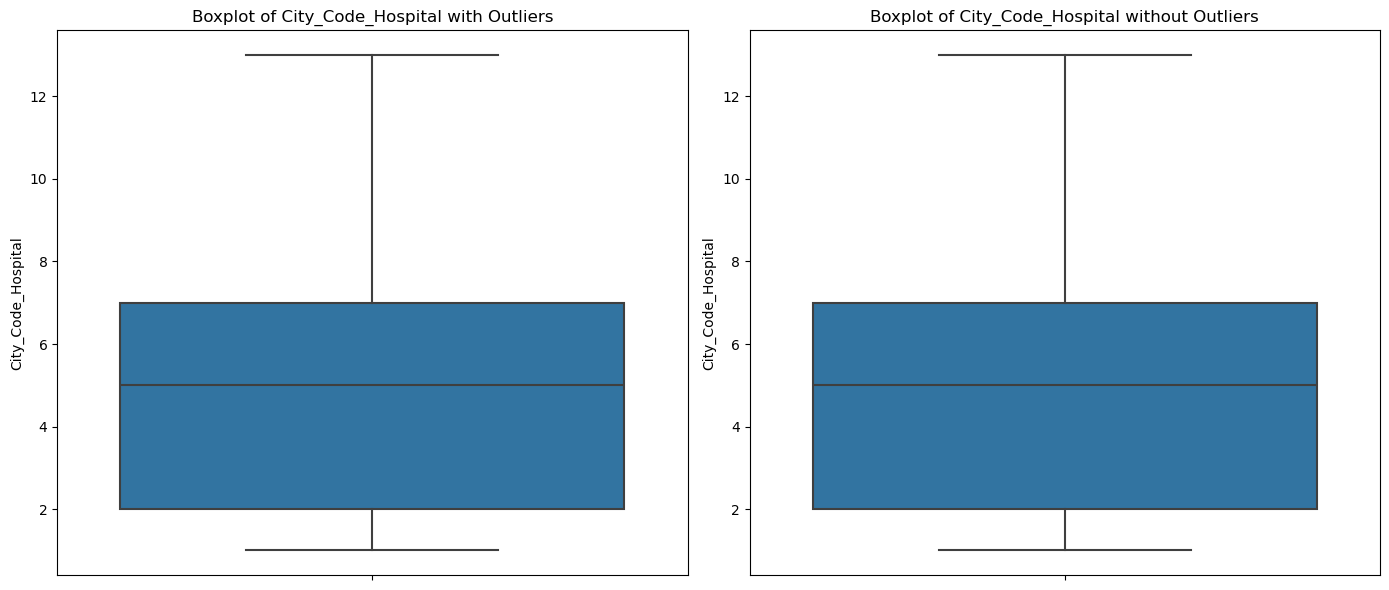


Ідентифікація викидів для Available Extra Rooms in Hospital:
Кількість викидів у Available Extra Rooms in Hospital: 1351
Приклади викидів у Available Extra Rooms in Hospital:
110      8
317      9
413      8
593      8
1006    10
Name: Available Extra Rooms in Hospital, dtype: int64


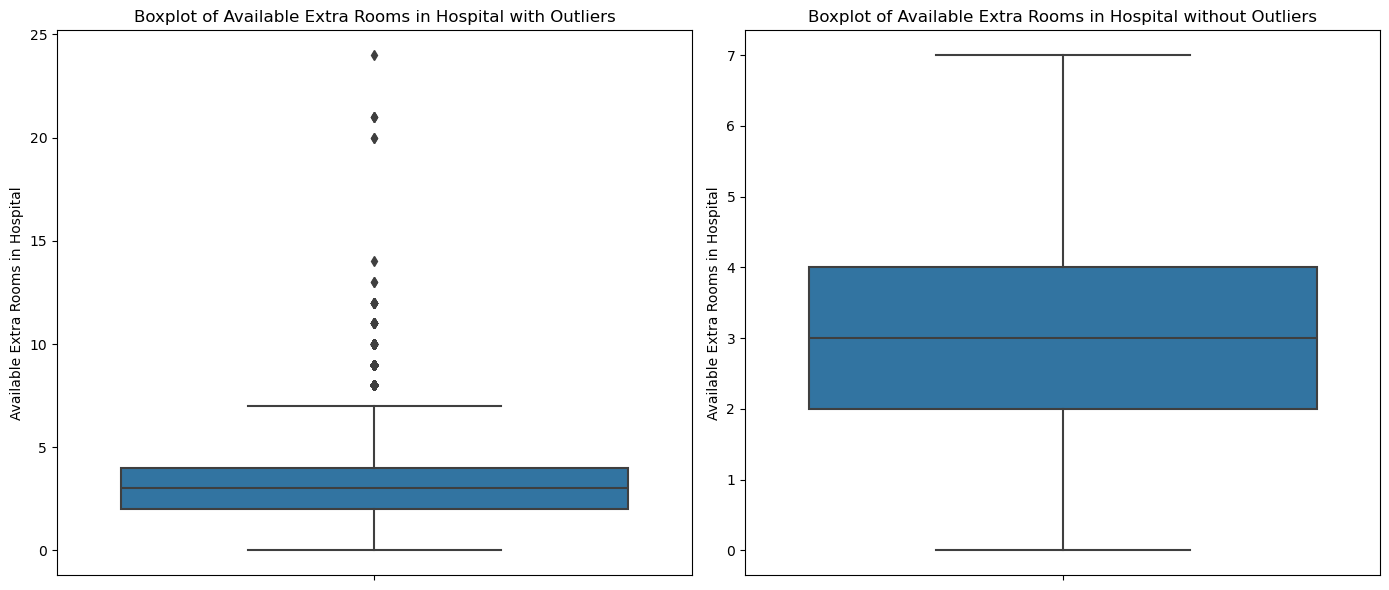


Ідентифікація викидів для Bed Grade:
Кількість викидів у Bed Grade: 0


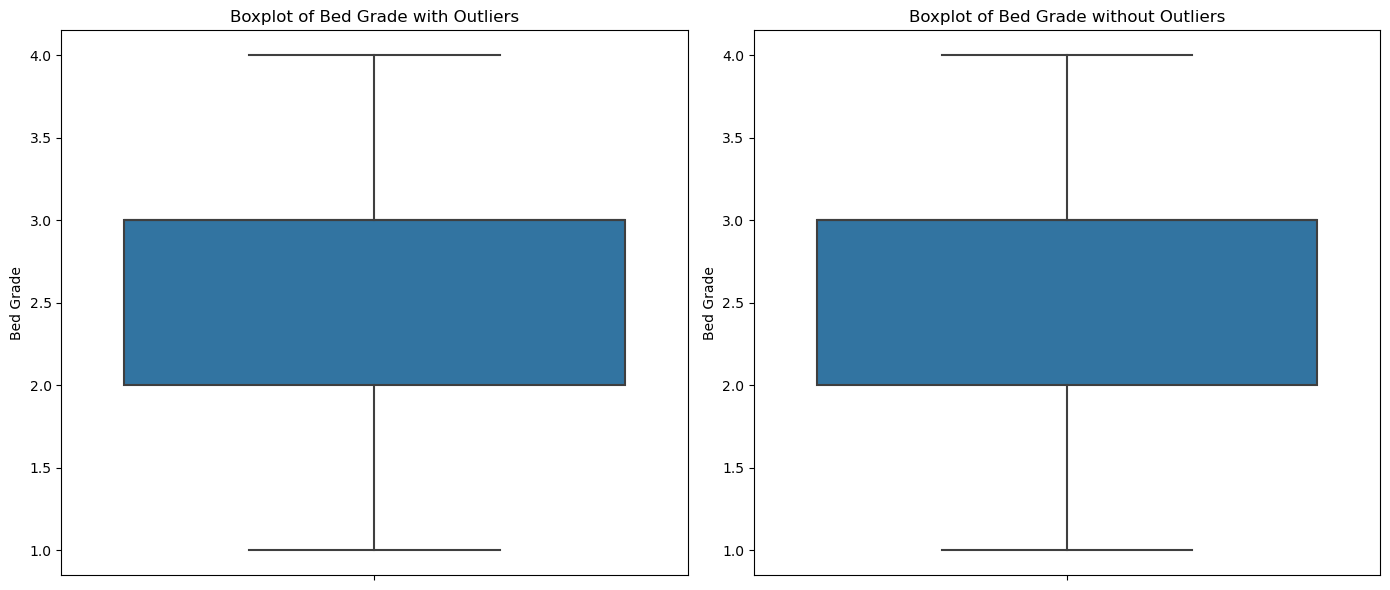


Ідентифікація викидів для City_Code_Patient:
Кількість викидів у City_Code_Patient: 24682
Приклади викидів у City_Code_Patient:
196    25.0
197    25.0
198    25.0
199    25.0
214    15.0
Name: City_Code_Patient, dtype: float64


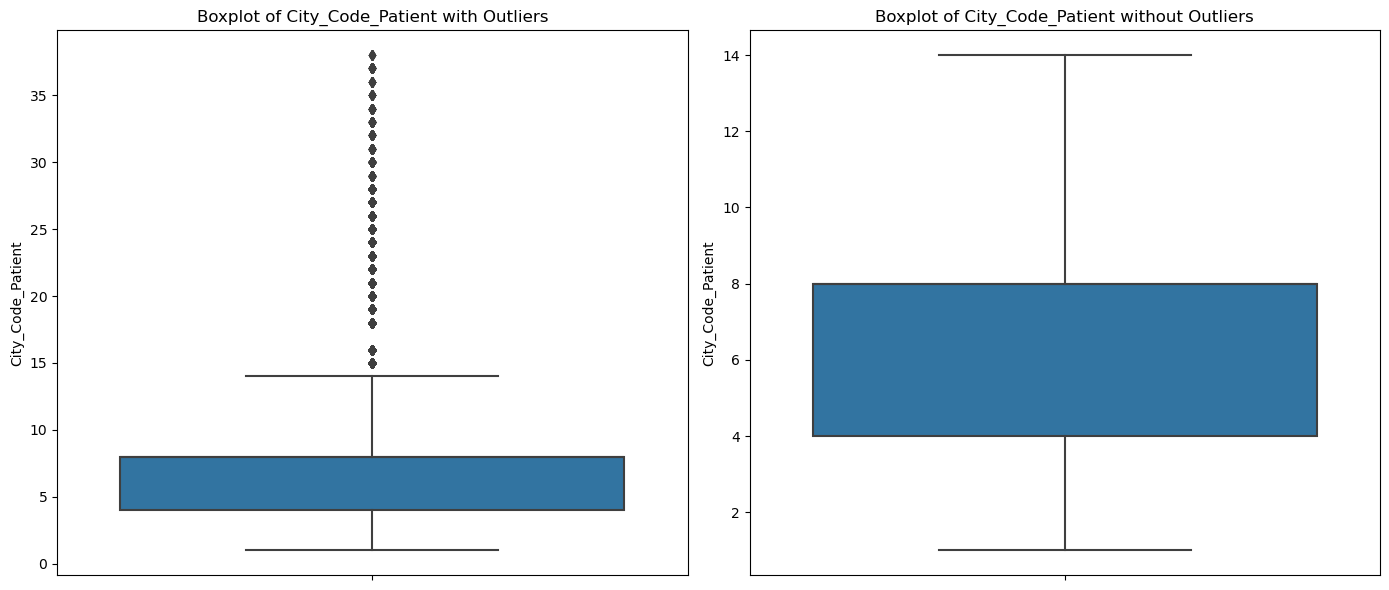


Ідентифікація викидів для Visitors with Patient:
Кількість викидів у Visitors with Patient: 9034
Приклади викидів у Visitors with Patient:
36      8
90     13
93      8
151     8
304    10
Name: Visitors with Patient, dtype: int64


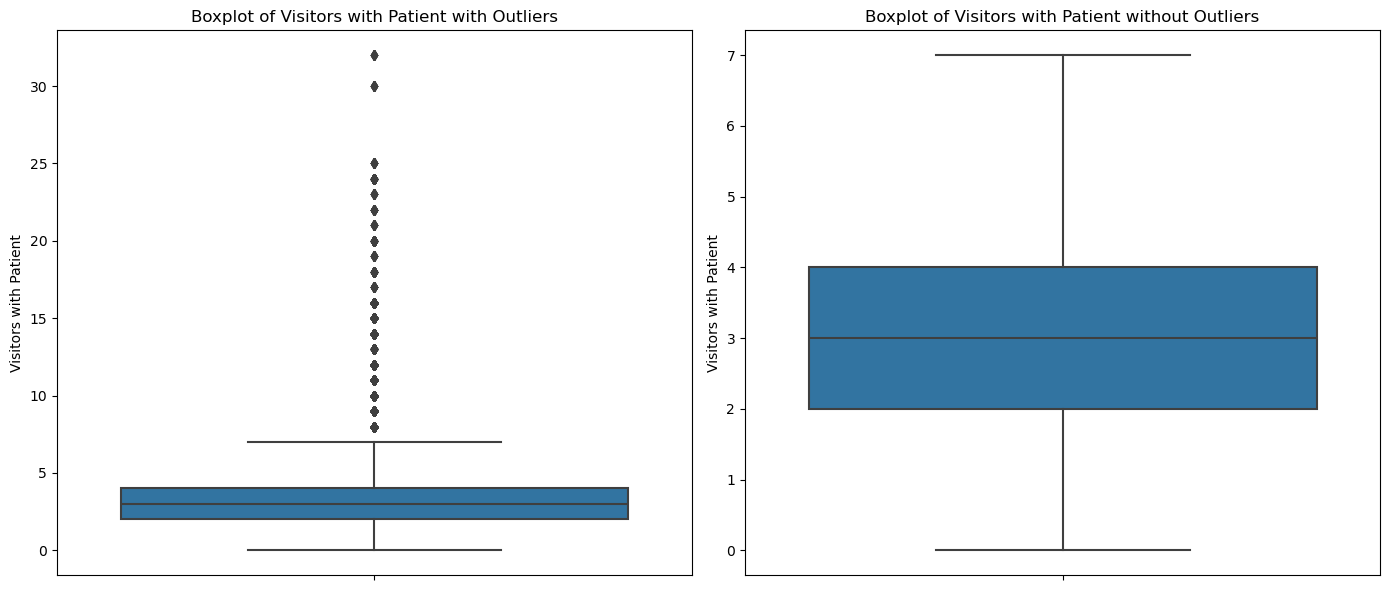


Ідентифікація викидів для Admission_Deposit:
Кількість викидів у Admission_Deposit: 10893
Приклади викидів у Admission_Deposit:
3     7272.0
8     7223.0
13    8477.0
15    9398.0
18    7442.0
Name: Admission_Deposit, dtype: float64


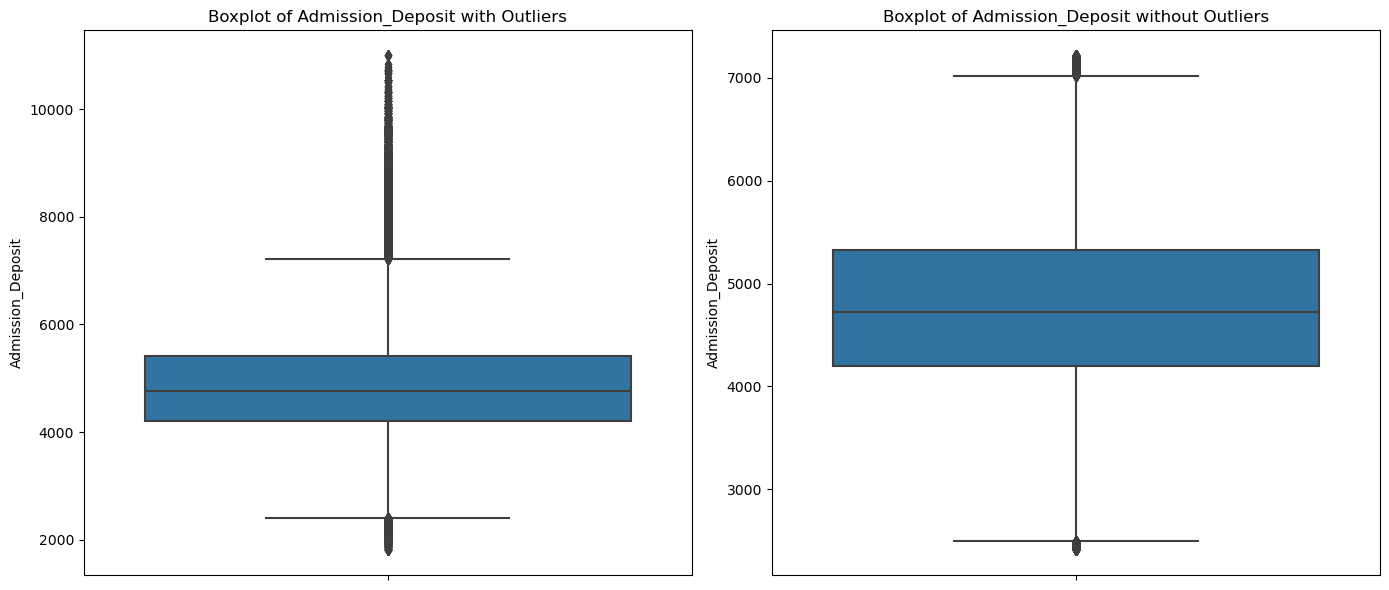


Ідентифікація викидів для doctorid:
Кількість викидів у doctorid: 1916
Приклади викидів у doctorid:
101    5.0
102    6.0
103    7.0
104    8.0
105    9.0
Name: doctorid, dtype: float64


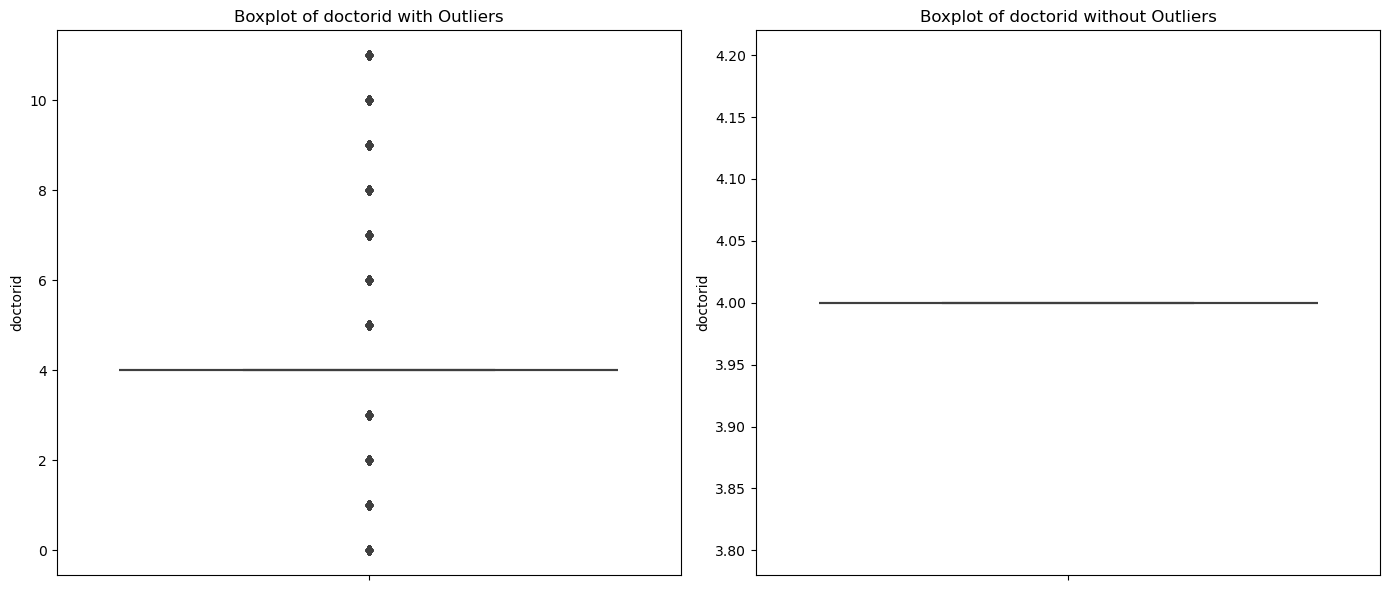


Перевірка розміру даних після видалення викидів:
(270562, 19)


In [ ]:
# Ідентифікація викидів за допомогою IQR
def identify_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

# Видалення викидів за допомогою IQR
def remove_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Візуалізація викидів до та після видалення
def plot_outliers(data, feature):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    sns.boxplot(y=data[feature], ax=axs[0])
    axs[0].set_title(f'Boxplot of {feature} with Outliers')

    cleaned_data = remove_outliers(data, feature)
    sns.boxplot(y=cleaned_data[feature], ax=axs[1])
    axs[1].set_title(f'Boxplot of {feature} without Outliers')

    plt.tight_layout()
    plt.show()

    return cleaned_data

# Ідентифікація та видалення викидів для всіх числових ознак
for feature in numerical_features:
    print(f"\nІдентифікація викидів для {feature}:")
    outliers = identify_outliers(data, feature)
    print(f"Кількість викидів у {feature}: {len(outliers)}")

    if len(outliers) > 0:
        print(f"Приклади викидів у {feature}:")
        print(outliers[feature].head())

    # Візуалізація викидів до та після видалення
    data = plot_outliers(data, feature)

# Перевірка даних після видалення викидів
print("\nПеревірка розміру даних після видалення викидів:")
print(data.shape)


In [ ]:
### Генерація нової ознаки

In [ ]:
# Функція для перетворення Stay в Stay_Days
def convert_stay_to_days(stay):
    if stay == '0-10':
        return 5
    elif stay == '11-20':
        return 15
    elif stay == '21-30':
        return 25
    elif stay == '31-40':
        return 35
    elif stay == '41-50':
        return 45
    elif stay == '51-60':
        return 55
    elif stay == '61-70':
        return 65
    elif stay == '71-80':
        return 75
    elif stay == '81-90':
        return 85
    elif stay == '91-100':
        return 95
    elif stay == 'More than 100 Days':
        return 110
    else:
        return np.nan

# Створення нової ознаки Stay_Days
data['Stay_Days'] = data['Stay'].apply(convert_stay_to_days)

# Перевірка нової ознаки
print(data[['Stay', 'Stay_Days']].head())


    Stay  Stay_Days
0   0-10          5
1  41-50         45
2  31-40         35
4  41-50         45
5  11-20         15


In [ ]:
### Підготовка даних для моделей

In [ ]:
# Перетворення категоріальних ознак у числові
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Розділення даних на тренувальні та тестові набори
X = data.drop(columns=['Stay', 'Stay_Days'])
y_classification = data['Stay']
y_regression = data['Stay_Days']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Балансування даних з SMOTE для класифікації
smote = SMOTE(random_state=42)
X_resampled_class, y_resampled_class = smote.fit_resample(X_train_class, y_train_class)

# Регресія не використовує SMOTE, тому просто розділимо дані на тренувальні та тестові набори
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

print(f"Розмір тренувального набору для класифікації: {X_train_class.shape}")
print(f"Розмір тестового набору для класифікації: {X_test_class.shape}")
print(f"Розмір тренувального набору для регресії: {X_train_reg.shape}")
print(f"Розмір тестового набору для регресії: {X_test_reg.shape}")


Розмір тренувального набору для класифікації: (216449, 18)
Розмір тестового набору для класифікації: (54113, 18)
Розмір тренувального набору для регресії: (216449, 18)
Розмір тестового набору для регресії: (54113, 18)


In [ ]:
### Виправлення назв ознак для запобігання помилки на наступних етапах

In [ ]:
# Перевірка та виправлення назв ознак
data.columns = data.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Оновлення списків ознак після виправлення назв
numerical_features = ['Hospital_code', 'City_Code_Hospital', 'AvailableExtraRoomsinHospital',
                      'BedGrade', 'City_Code_Patient', 'VisitorswithPatient',
                      'Admission_Deposit', 'doctorid']
categorical_features = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
                        'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness', 'Age',
                        'Stay']

print(f"Числові ознаки: {numerical_features}")
print(f"Категоріальні ознаки: {categorical_features}")

# Виправлення даних у колонках на предмет спеціальних символів
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace('[^A-Za-z0-9_]+', '', regex=True)

print("Назви колонок після виправлення:")
print(data.columns)


Числові ознаки: ['Hospital_code', 'City_Code_Hospital', 'AvailableExtraRoomsinHospital', 'BedGrade', 'City_Code_Patient', 'VisitorswithPatient', 'Admission_Deposit', 'doctorid']
Категоріальні ознаки: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness', 'Age', 'Stay']
Назви колонок після виправлення:
Index(['Unnamed0', 'case_id', 'Hospital_code', 'Hospital_type_code',
       'City_Code_Hospital', 'Hospital_region_code',
       'AvailableExtraRoomsinHospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'BedGrade', 'City_Code_Patient',
       'TypeofAdmission', 'SeverityofIllness', 'VisitorswithPatient', 'Age',
       'Admission_Deposit', 'Stay', 'doctorid', 'Stay_Days'],
      dtype='object')


In [ ]:
### Тренування моделей

In [ ]:
# Підготовка даних для класифікації
X = data.drop(columns=['Stay', 'Stay_Days'])
y_classification = data['Stay']

# Видалення спеціальних символів з назв характеристик
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Балансування класів з SMOTE для класифікації
smote = SMOTE(random_state=42)
X_resampled_class, y_resampled_class = smote.fit_resample(X_train_class, y_train_class)

# Модель для задачі класифікації з GPU (XGBoost)
clf_xgb = xgb.XGBClassifier(tree_method='hist', device='cuda', random_state=42, n_estimators=100)
clf_xgb.fit(X_resampled_class, y_resampled_class)
y_pred_class_xgb = clf_xgb.predict(X_test_class)
print("Класифікація (XGBoost):")
print(classification_report(y_test_class, y_pred_class_xgb))
print(f"Точність: {accuracy_score(y_test_class, y_pred_class_xgb)}")

# Модель для задачі класифікації з GPU (LightGBM)
clf_lgb = lgb.LGBMClassifier(device='gpu', random_state=42, n_estimators=100)
clf_lgb.fit(X_resampled_class, y_resampled_class)
y_pred_class_lgb = clf_lgb.predict(X_test_class)
print("Класифікація (LightGBM):")
print(classification_report(y_test_class, y_pred_class_lgb))
print(f"Точність: {accuracy_score(y_test_class, y_pred_class_lgb)}")

# Підготовка даних для регресії
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, data['Stay_Days'], test_size=0.2, random_state=42)

# Модель для задачі регресії з GPU (XGBoost)
reg_xgb = xgb.XGBRegressor(tree_method='hist', device='cuda', random_state=42, n_estimators=100)
reg_xgb.fit(X_train_reg, y_train_reg)
y_pred_reg_xgb = reg_xgb.predict(X_test_reg)
print("Регресія (XGBoost):")
print(f"Середня квадратична помилка (XGBoost): {mean_squared_error(y_test_reg, y_pred_reg_xgb)}")

# Модель для задачі регресії з GPU (LightGBM)
reg_lgb = lgb.LGBMRegressor(device='gpu', random_state=42, n_estimators=100)
reg_lgb.fit(X_train_reg, y_train_reg)
y_pred_reg_lgb = reg_lgb.predict(X_test_reg)
print("Регресія (LightGBM):")
print(f"Середня квадратична помилка (LightGBM): {mean_squared_error(y_test_reg, y_pred_reg_lgb)}")


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:48:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Класифікація (XGBoost):
              precision    recall  f1-score   support

           0       0.36      0.17      0.23      4068
           1       0.44      0.48      0.46     13690
           2       0.42      0.66      0.52     15106
           3       0.42      0.21      0.28      9592
           4       0.11      0.01      0.02      2009
           5       0.42      0.38      0.40      5949
           6       0.01      0.01      0.01       438
           7       0.15      0.05      0.08      1595
           8       0.22      0.34      0.27       690
           9       0.06      0.07      0.06       370
          10       0.19      0.24      0.21       606

    accuracy                           0.41     54113
   macro avg       0.25      0.24      0.23     54113
weighted avg       0.39      0.41      0.38     54113

Точність: 0.4081274370299189
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set

In [ ]:
### Оптимізація моделей

In [ ]:
# Виведення назв колонок для перевірки
print(data.columns)

# Обробка числових ознак
numerical_features = ['Hospital_code', 'City_Code_Hospital', 'AvailableExtraRoomsinHospital', 'BedGrade', 'City_Code_Patient', 'VisitorswithPatient', 'Admission_Deposit']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Обробка категоріальних ознак
categorical_features = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'TypeofAdmission', 'SeverityofIllness', 'Age', 'doctorid']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Об'єднання обробки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Застосування обробки до даних для класифікації
X_classification = data.drop(columns=['Stay', 'Stay_Days'])
y_classification = data['Stay']
X_classification = preprocessor.fit_transform(X_classification)

# Розділення на тренувальний і тестовий набори для класифікації
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Балансування даних з SMOTE для класифікації
smote = SMOTE(random_state=42)
X_resampled_class, y_resampled_class = smote.fit_resample(X_train_class, y_train_class)

# Оптимізація гіперпараметрів з Optuna для класифікації
def objective_class(trial):
    param = {
        'tree_method': 'hist',
        'device': 'cuda',
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True)
    }

    clf = xgb.XGBClassifier(**param)
    return cross_val_score(clf, X_resampled_class, y_resampled_class, cv=3, scoring='accuracy').mean()

study_class = optuna.create_study(direction='maximize')
study_class.optimize(objective_class, n_trials=50)

print('Best trial for classification:', study_class.best_trial.params)

# Тренування моделі з оптимальними параметрами для класифікації
best_params_class = study_class.best_trial.params
clf_xgb = xgb.XGBClassifier(**best_params_class)  # Виправлено: видалено n_estimators=100
clf_xgb.fit(X_resampled_class, y_resampled_class)
y_pred_class_xgb = clf_xgb.predict(X_test_class)
print("Класифікація (XGBoost):")
print(classification_report(y_test_class, y_pred_class_xgb))
print(f"Точність (XGBoost): {accuracy_score(y_test_class, y_pred_class_xgb)}")

# Модель для задачі класифікації з GPU (LightGBM)
clf_lgb = lgb.LGBMClassifier(device='gpu', random_state=42, n_estimators=100)
clf_lgb.fit(X_resampled_class, y_resampled_class)
y_pred_class_lgb = clf_lgb.predict(X_test_class)
print("Класифікація (LightGBM):")
print(classification_report(y_test_class, y_pred_class_lgb))
print(f"Точність (LightGBM): {accuracy_score(y_test_class, y_pred_class_lgb)}")

# Застосування обробки до даних для регресії
X_regression = data.drop(columns=['Stay', 'Stay_Days'])
y_regression = data['Stay_Days']
X_regression = preprocessor.fit_transform(X_regression)

# Розділення на тренувальний і тестовий набори для регресії
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Оптимізація гіперпараметрів з Optuna для регресії
def objective_reg(trial):
    param = {
        'tree_method': 'hist',
        'device': 'cuda',
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True)
    }

    reg = xgb.XGBRegressor(**param)
    return cross_val_score(reg, X_train_reg, y_train_reg, cv=3, scoring='neg_mean_squared_error').mean()

study_reg = optuna.create_study(direction='minimize')
study_reg.optimize(objective_reg, n_trials=50)

print('Best trial for regression:', study_reg.best_trial.params)

# Тренування регресійної моделі з оптимальними параметрами
best_params_reg = study_reg.best_trial.params
reg_xgb = xgb.XGBRegressor(**best_params_reg)  # Виправлено: видалено n_estimators=100
reg_xgb.fit(X_train_reg, y_train_reg)
y_pred_reg_xgb = reg_xgb.predict(X_test_reg)
print("Регресія (XGBoost):")
print(f"Середня квадратична помилка (XGBoost): {mean_squared_error(y_test_reg, y_pred_reg_xgb)}")

# Модель для задачі регресії з GPU (LightGBM)
reg_lgb = lgb.LGBMRegressor(device='gpu', random_state=42, n_estimators=100)
reg_lgb.fit(X_train_reg, y_train_reg)
y_pred_reg_lgb = reg_lgb.predict(X_test_reg)
print("Регресія (LightGBM):")
print(f"Середня квадратична помилка (LightGBM): {mean_squared_error(y_test_reg, y_pred_reg_lgb)}")


Index(['Unnamed0', 'case_id', 'Hospital_code', 'Hospital_type_code',
       'City_Code_Hospital', 'Hospital_region_code',
       'AvailableExtraRoomsinHospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'BedGrade', 'City_Code_Patient',
       'TypeofAdmission', 'SeverityofIllness', 'VisitorswithPatient', 'Age',
       'Admission_Deposit', 'Stay', 'doctorid', 'Stay_Days'],
      dtype='object')


[I 2024-05-18 15:49:04,877] A new study created in memory with name: no-name-96d92fb0-eab6-483b-9317-3a6c8d74d527
[I 2024-05-18 15:57:48,538] Trial 0 finished with value: 0.6107026646156464 and parameters: {'n_estimators': 181, 'max_depth': 15, 'learning_rate': 7.94945929591654e-05, 'subsample': 0.8131789989654785, 'colsample_bytree': 0.5012350415293686, 'min_child_weight': 5, 'gamma': 0.17334831551438573, 'reg_alpha': 4.735533344103706e-05, 'reg_lambda': 0.000310254570798474}. Best is trial 0 with value: 0.6107026646156464.
[I 2024-05-18 15:58:23,426] Trial 1 finished with value: 0.27804501135097776 and parameters: {'n_estimators': 51, 'max_depth': 9, 'learning_rate': 1.0071564085027079e-08, 'subsample': 0.9604107143777859, 'colsample_bytree': 0.8387650968163507, 'min_child_weight': 2, 'gamma': 0.2894994551253196, 'reg_alpha': 0.18125469802467714, 'reg_lambda': 0.00013902228093440493}. Best is trial 0 with value: 0.6107026646156464.
[I 2024-05-18 15:58:53,380] Trial 2 finished with va

Best trial for classification: {'n_estimators': 199, 'max_depth': 14, 'learning_rate': 0.1622845619333078, 'subsample': 0.5594738238079559, 'colsample_bytree': 0.9773896983883501, 'min_child_weight': 1, 'gamma': 0.13404978202805437, 'reg_alpha': 5.672161895928303e-07, 'reg_lambda': 0.0033441570140233835}
Класифікація (XGBoost):
              precision    recall  f1-score   support

           0       0.30      0.23      0.26      4068
           1       0.40      0.44      0.42     13690
           2       0.42      0.54      0.47     15106
           3       0.33      0.25      0.29      9592
           4       0.13      0.04      0.06      2009
           5       0.40      0.43      0.41      5949
           6       0.02      0.01      0.01       438
           7       0.22      0.11      0.15      1595
           8       0.32      0.26      0.29       690
           9       0.18      0.06      0.09       370
          10       0.30      0.18      0.23       606

    accuracy        

[I 2024-05-18 19:06:35,412] A new study created in memory with name: no-name-ba3d8351-c403-4c1d-bb16-0fd1c57e4f16
[I 2024-05-18 19:06:41,491] Trial 0 finished with value: -244.81211332428438 and parameters: {'n_estimators': 141, 'max_depth': 10, 'learning_rate': 0.1799738008668485, 'subsample': 0.502369366809033, 'colsample_bytree': 0.8854340004987323, 'min_child_weight': 10, 'gamma': 0.30657204523229087, 'reg_alpha': 6.418970973216745e-05, 'reg_lambda': 0.03227674275558767}. Best is trial 0 with value: -244.81211332428438.
[I 2024-05-18 19:06:44,742] Trial 1 finished with value: -282.8134198700787 and parameters: {'n_estimators': 74, 'max_depth': 9, 'learning_rate': 0.7553161857923727, 'subsample': 0.8757214157163029, 'colsample_bytree': 0.6427383898799732, 'min_child_weight': 5, 'gamma': 0.3294468195420709, 'reg_alpha': 0.001697559015486913, 'reg_lambda': 0.7660109575516658}. Best is trial 1 with value: -282.8134198700787.
[I 2024-05-18 19:07:42,402] Trial 2 finished with value: -398

Best trial for regression: {'n_estimators': 165, 'max_depth': 4, 'learning_rate': 1.160152729518392e-08, 'subsample': 0.7527596846738042, 'colsample_bytree': 0.8381455758701855, 'min_child_weight': 8, 'gamma': 0.11052447810647945, 'reg_alpha': 0.20155150514427567, 'reg_lambda': 6.498385050049263e-07}
Регресія (XGBoost):
Середня квадратична помилка (XGBoost): 400.5585142968643
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 216449, number of used features: 49
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 14 dense feature groups (3.30 MB) transferred to GPU in 0.009340 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 30.577087
Регресія (LightGBM):
Середня квадрати

In [ ]:
### Збереження моделей

In [ ]:
# Функція для збереження моделей
def save_models(models, filenames):
    for model, filename in zip(models, filenames):
        joblib.dump(model, filename)
        print(f"Модель збережена у файлі {filename}")

# Функція для запиту у користувача
def ask_user_to_save_models():
    response = input("Чи бажаєте ви зберегти натреновані моделі? (так/ні): ").strip().lower()
    if response == 'так':
        models = [clf_xgb, clf_lgb, reg_xgb, reg_lgb]
        filenames = ['xgb_classification_model.pkl', 'lgb_classification_model.pkl', 'xgb_regression_model.pkl', 'lgb_regression_model.pkl']
        save_models(models, filenames)
    else:
        print("Моделі не були збережені.")

# Виклик функції для запиту у користувача
ask_user_to_save_models()